In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.applications.vgg16 import decode_predictions
from keras.utils import load_img, img_to_array
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.gradcam import GradcamPlusPlus
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.scorecam import ScoreCAM
from tf_keras_vis.utils import normalize

from cam_generator import ScoreCamSaliency

In [2]:
model = tf.keras.applications.vgg16.VGG16(weights="imagenet")
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [3]:
def show_image(ary, act_map):
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    ax[0].imshow(act_map, cmap="hot")
    ax[0].axis("off")
    ax[1].imshow(ary/np.max(ary))
    ax[1].axis("off")
    plt.show()

In [16]:
def GetGradCAM(cls_index, img, model):
  def loss(output):
    return (output[0][cls_index])
  def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m
  gradcam = Gradcam(model,model_modifier=model_modifier,clone=False)
  cam = gradcam(loss, img, penultimate_layer=-1)
  cam = normalize(cam)
  return cam

def GetGradCAMPlusPlus(cls_index, img, model):
  def loss(output):
    return (output[0][cls_index])
  def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m
  gradcam = GradcamPlusPlus(model,model_modifier=model_modifier,clone=False)
  cam = gradcam(loss, img, penultimate_layer=-1)
  cam = normalize(cam)
  return cam

def GetSmoothGrad(cls_index, img, model):
  def loss(output):
    return (output[0][cls_index])
  def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m
  saliency = Saliency(model,model_modifier=model_modifier,clone=False)
  cam = saliency(loss, img, smooth_samples=20, smooth_noise=0.20)
  cam = normalize(cam)
  return cam

In [20]:
img_file = "images/hamburger.jpg"
img = load_img(img_file, target_size=(224, 224))
ary = img_to_array(img)

In [21]:
pred = model.predict(ary[np.newaxis, :, :, :])
n = np.argmax(pred)
layer_name = "block5_conv3"
results = decode_predictions(pred, top=5)[0]
for result in results:
    print(result)

1/1 [==============================] - 0s 105ms/step
('n07697313', 'cheeseburger', 0.6318108)
('n07614500', 'ice_cream', 0.12358033)
('n01910747', 'jellyfish', 0.05999858)
('n07613480', 'trifle', 0.051760796)
('n07615774', 'ice_lolly', 0.04309395)


16/16 [==============================] - 32s 2s/step


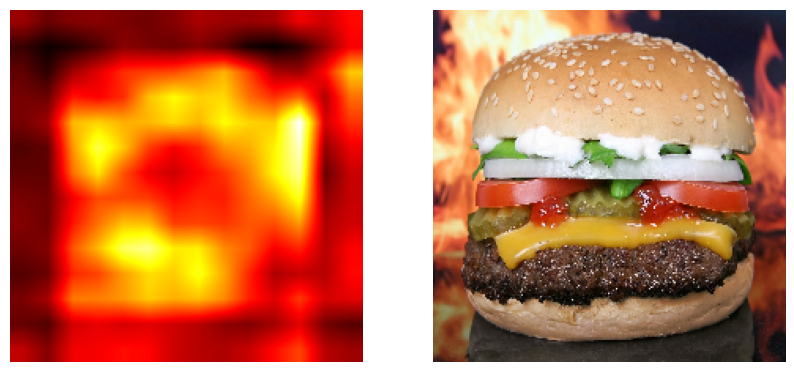

In [22]:
score_cam = ScoreCamSaliency(model, n, layer_name)
act_map, y = score_cam(ary[np.newaxis, :, :, :])
show_image(ary, act_map[0])

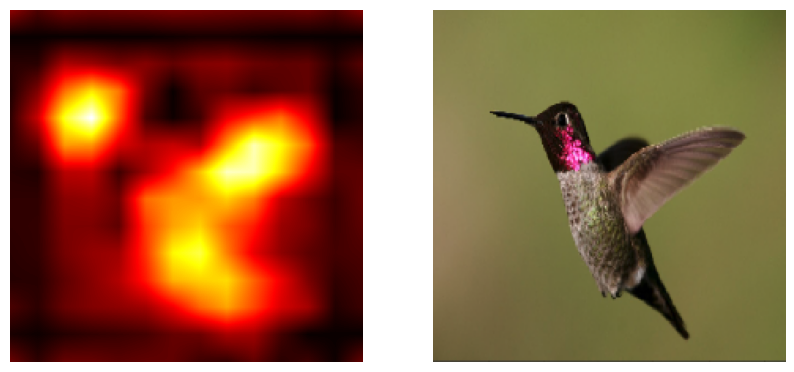

In [17]:
act_map = GetGradCAM(n, ary[np.newaxis, :, :, :], model)
show_image(ary, act_map[0])

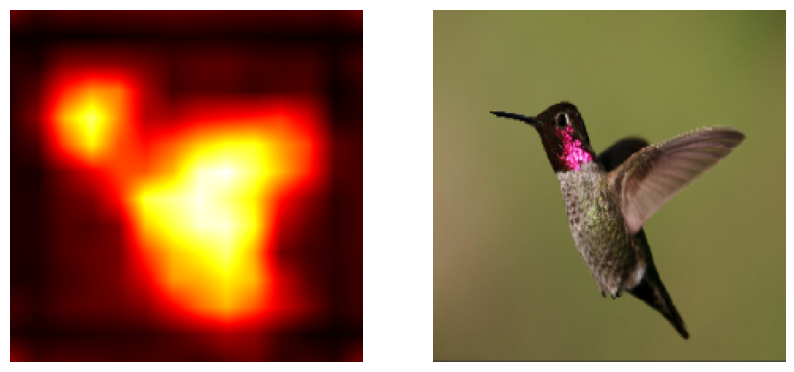

In [18]:
act_map = GetGradCAMPlusPlus(n, ary[np.newaxis, :, :, :], model)
show_image(ary, act_map[0])

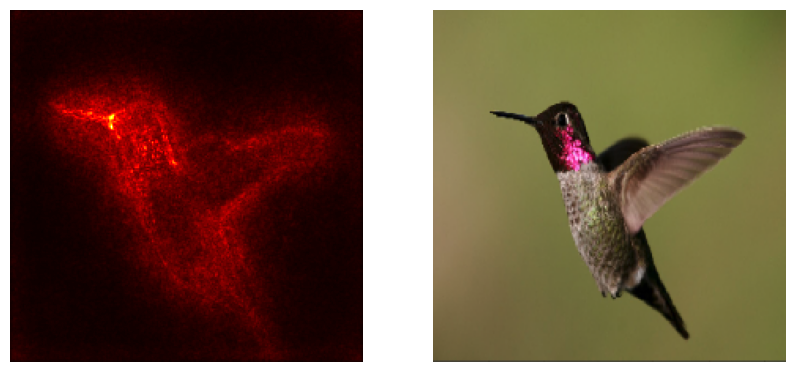

In [19]:
act_map = GetSmoothGrad(n, ary[np.newaxis, :, :, :], model)
show_image(ary, act_map[0])